In [1]:
import torch
import pickle
from itertools import chain
from helper.model import *
from helper.utils import *
from helper.distance_map import *
from helper.evaluate import *
from scipy import stats
from tqdm import tqdm
import pandas as pd
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

args_train_data = "uniref100_full"
args_test_data = "price_149"
#args_test_data = "new"
args_model_name = "split100_ensemble/split100_"  
args_weight_path = "uncertainty_ensemble/" 
args_N_models = 8

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
dtype = torch.float32
#
id_ec_train, ec_id_dict_train = get_ec_id_dict('./data/'+args_train_data+'.csv')
id_ec_test, _ = get_ec_id_dict('./data/'+args_test_data+'.csv')

In [ ]:
# keep models output embeddings
esm_embedding_train = esm_embedding(ec_id_dict_train, device, dtype)

for i in (range(args_N_models)):
    model_i = LayerNormNet(512, 128, device, dtype)
    model_name_i = args_model_name + str(i)
    print("loading model:", model_name_i)
    checkpoint = torch.load('./model/' + model_name_i + '.pth')
    model_i.load_state_dict(checkpoint)
    model_i.eval()
    emb_train_i = model_i(esm_embedding_train) 
    emb_test_i = model_embedding_test(id_ec_test, model_i, device, dtype) 
    emb_train_i_path = args_weight_path+args_test_data+"_emb_train_"+str(i)+'.pt'
    emb_test_i_path = args_weight_path+args_test_data+"_emb_test_"+str(i)+'.pt'
    torch.save(emb_train_i, emb_train_i_path)
    torch.save(emb_test_i, emb_test_i_path)

In [10]:
eval_dist

{'WP_063460136': {'2.7.10.2': 16.395086,
  '3.5.2.6': 14.595,
  '2.3.2.27': 17.393717,
  '3.4.22.53': 17.350586,
  '3.4.22.54': 17.678017,
  '3.4.21.42': 17.620184,
  '4.2.1.1': 14.193442,
  '1.5.1.5': 18.607485,
  '3.5.4.9': 18.59407,
  '6.3.4.3': 15.765527,
  '2.5.1.48': 15.854405,
  '2.7.12.2': 17.428875,
  '2.7.11.22': 16.256878,
  '2.7.7.85': 19.020287,
  '3.1.3.36': 17.83847,
  '1.21.99.3': 17.79187,
  '4.1.2.40': 15.310469,
  '2.3.1.199': 15.73486,
  '1.14.99.66': 18.535137,
  '1.14.11.66': 15.807928,
  '2.7.3.2': 17.08146,
  '3.4.19.12': 16.63675,
  '2.7.1.91': 15.3990965,
  '2.3.1.297': 15.012997,
  '1.1.1.27': 14.455094,
  '2.7.1.40': 17.973843,
  '3.4.21.53': 19.139313,
  '1.13.11.34': 16.206533,
  '3.1.1.3': 15.378657,
  '3.1.1.5': 14.559241,
  '3.1.1.32': 15.350712,
  '1.4.3.20': 16.504807,
  '3.1.1.79': 17.059984,
  '3.1.1.23': 17.122818,
  '2.3.1.23': 16.65373,
  '2.3.1.n6': 17.073984,
  '2.3.1.121': 17.711636,
  '2.3.1.67': 17.382471,
  '2.3.1.n7': 17.036226,
  '4.1.1.3

In [2]:
# get distance map for all models
eval_dist_lst_all = []
for i in (range(args_N_models)):
    emb_train_i_path = args_weight_path+args_test_data+"_emb_train_"+str(i)+'.pt'
    emb_test_i_path = args_weight_path+args_test_data+"_emb_test_"+str(i)+'.pt'
    emb_train = torch.load(emb_train_i_path)
    emb_test = torch.load(emb_test_i_path)
    eval_dist = get_dist_map_test(
            emb_train, emb_test, ec_id_dict_train, id_ec_test, 
            device, dtype, dot=False)
    eval_dist_lst_all.append(eval_dist)

The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:02<00:00, 2183.71it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 654.95it/s]


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 12570.73it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 816.44it/s]


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 12707.89it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 600.81it/s]


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 13580.31it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 693.03it/s]


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 13023.64it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 750.64it/s]


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 12190.71it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 613.17it/s]


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 11141.31it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 660.76it/s]


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 11408.10it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 691.42it/s]


In [3]:
def get_precision_bins(eval_dist_lst, N_bins=6, N_random_models=5,
                       use_std_pred=True):
    # use_std_pred: whether use percentile 
    # calculated from maxsep predictions only
    ############################################################
    eval_dist_w_std = dict()
    eval_dist_mean = dict()
    # keep track of all query/ec dist std for future ranking
    all_dist_std = []
    # calculate distance map with standard deviation
    print("calculating mean distance and std")
    for query in  tqdm(eval_dist_lst[0].keys()):
        dist_mean_std = dict()
        dist_mean_dict = dict()
        # get the ec/distance dictionary
        for ec in eval_dist_lst[0][query]:
            # find distances for this query/ec pair for these models
            all_dist_per_ec = []
            for i in range(N_random_models):
                all_ec_dist_per_query = eval_dist_lst[i][query] 
                dist_i = all_ec_dist_per_query[ec]
                all_dist_per_ec.append(dist_i)
            dist_mean = np.mean(all_dist_per_ec)
            dist_std = np.std(all_dist_per_ec)
            all_dist_std.append(dist_std)
            dist_mean_std[ec] = (dist_mean, dist_std)
            dist_mean_dict[ec] = dist_mean
        eval_dist_w_std[query] = dist_mean_std
        eval_dist_mean[query] = dist_mean_dict
    ############################################################
    # get max sep prediction results for all models
    certainty_from_all_dist_lst = []
    certainty_from_dist_in_pred_lst = []
    all_std_in_pred_lst = []
    dist_map_df = pd.DataFrame.from_dict(eval_dist_mean); 
    first_grad=True; use_max_grad=False
    # get predictions
    query_prediction_lst = []
    for query in tqdm(dist_map_df.columns):
        smallest_10_dist_df = dist_map_df[query].nsmallest(10)
        dist_lst = list(smallest_10_dist_df)
        max_sep_i = maximum_separation(dist_lst, first_grad, use_max_grad)
        predictions = []
        for i in range(max_sep_i+1):
            EC_i = smallest_10_dist_df.index[i]
            dist_i = smallest_10_dist_df[i]
            predictions.append((EC_i, dist_i))
            _, dist_std = eval_dist_w_std[query][EC_i]
            # keep track of all dist std appeared in prediction
            all_std_in_pred_lst.append(dist_std)
            #print(query, EC_i, dist_std, perc_certainty)
        query_prediction_lst.append((query, predictions))
    ############################################################
    bins_query_by_certainty = [[] for i in range(N_bins)]
    query_count = 0
    for query in tqdm(dist_map_df.columns):
        smallest_10_dist_df = dist_map_df[query].nsmallest(10)
        dist_lst = list(smallest_10_dist_df)
        max_sep_i = maximum_separation(dist_lst, first_grad, use_max_grad)
        # bin by minimum certainty
        certainty_per_query = []
        for i in range(max_sep_i+1):
            EC_i = smallest_10_dist_df.index[i]
            dist_i = smallest_10_dist_df[i]
            predictions.append((EC_i, dist_i))
            _, dist_std = eval_dist_w_std[query][EC_i]
            # certainty by all distance std in distance map
            perc_certainty = 1 - stats.percentileofscore(
                all_dist_std, dist_std, 'rank')/100
            certainty_from_all_dist_lst.append(perc_certainty)
            # certainty by all distance std in prediction
            perc_certainty_in_pred = 1 - stats.percentileofscore(
                all_std_in_pred_lst, dist_std, 'rank')/100
            certainty_from_dist_in_pred_lst.append(perc_certainty_in_pred)
            ###################################
            if use_std_pred:
                certainty_per_query.append(perc_certainty_in_pred) # perc method 2)
            else:
                certainty_per_query.append(perc_certainty) # perc method 1)
 
        min_certainty_query = min(certainty_per_query)
        for bin_i in range(N_bins):
            lower, upper = bin_i/N_bins, (bin_i+1)/N_bins
            if min_certainty_query >= lower and min_certainty_query < upper:
                bins_query_by_certainty[bin_i].append(query_count)
                #print("bin_i:", bin_i)
        query_count += 1
    ############################################################
    # make bins cumulative
    cumulative_bins = [[] for i in range(N_bins)]
    for i in range(len(bins_query_by_certainty)):
        for ii in range(i+1):
            cumulative_bins[i] += bins_query_by_certainty[ii]    
    ############################################################
    # write the top 10 closest EC to _top10.csv
    out_filename = './eval/' + args_test_data
    # _ = write_top10_choices(eval_df, out_filename)
    # maximum separation results
    write_max_sep_choices(dist_map_df, out_filename, first_grad=True, use_max_grad=False)
    # get preds and true labels
    pred_label = get_pred_labels(out_filename, pred_type='_maxsep')
    pred_probs = get_pred_probs(out_filename, pred_type='_maxsep')
    true_label, all_label = get_true_labels('./data/'+args_test_data)
    
    results_per_bin = []
    for bin_i in range(N_bins):
        query_bin = cumulative_bins[bin_i]
        pred_label_i = [pred_label[i] for i in query_bin]
        pred_probs_i = [pred_probs[i] for i in query_bin]
        true_label_i = [true_label[i] for i in query_bin]
        all_label_i = set(list(chain.from_iterable(true_label_i)))
        #print(pred_label_i, pred_probs_i, true_label_i, all_label_i)
        # print(pred_label_i, pred_probs_i, true_label_i)
        # raise
        pre, rec, f1, roc, acc = get_eval_metrics_new(
            pred_label_i, pred_probs_i, true_label_i, all_label_i)
        results_per_bin.append(pre)
        
    return results_per_bin

In [6]:
args_N_experiment = 8
args_N_random_models = 5
args_N_bins = 10
# randomly choose models to do ensemble
np.random.seed(1)
models_experiments = [np.random.choice(8, 5, replace=False) 
                      for i in range(args_N_experiment)]

In [7]:
result_bin_per_experiment = []
for experiment in models_experiments:
    eval_dist_lst = [eval_dist_lst_all[model] for model in experiment] 
    results_per_bin = get_precision_bins(
        eval_dist_lst, N_random_models=args_N_random_models,
        N_bins=args_N_bins, use_std_pred=True)
    result_bin_per_experiment.append(results_per_bin)

calculating mean distance and std


100%|██████████| 149/149 [00:07<00:00, 20.23it/s]


calculating mean distance and std


100%|██████████| 149/149 [00:09<00:00, 15.36it/s]


calculating mean distance and std


100%|██████████| 149/149 [00:06<00:00, 23.61it/s]


calculating mean distance and std


100%|██████████| 149/149 [00:06<00:00, 24.37it/s]


calculating mean distance and std


100%|██████████| 149/149 [00:05<00:00, 24.85it/s]


calculating mean distance and std


100%|██████████| 149/149 [00:06<00:00, 24.21it/s]


calculating mean distance and std


100%|██████████| 149/149 [00:06<00:00, 23.33it/s]


calculating mean distance and std


100%|██████████| 149/149 [00:06<00:00, 21.59it/s]


In [8]:
results_mean = []
results_std = []

for bin_i in range(args_N_bins):
    result_bin_i = [result_bin_per_experiment[i][bin_i]
                    for i in range(args_N_experiment)]
    results_mean.append(np.mean(result_bin_i))
    results_std.append(np.std(result_bin_i))
    

Text(0, 0.5, 'cumulative precision')

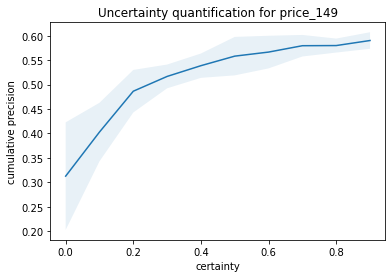

In [9]:
from matplotlib import pyplot as plt
import numpy as np
certainty_range = [i/args_N_bins for i in range(args_N_bins)]
plt.plot (certainty_range, results_mean)
lower = np.array(results_mean) - np.array(results_std)
upper = np.array(results_mean) + np.array(results_std)
plt.fill_between(certainty_range, lower, upper, alpha=.1)
plt.title("Uncertainty quantification for " + args_test_data)
plt.xlabel("certainty")
plt.ylabel("cumulative precision")